<H1> Les jeux de données pour le projet </H1>

Dans ce notebook nous présentons les jeux de données utilisés pour le projet. Nous proposons également des fonctions pour permettre de pouvoir facilement les données.   

Il n'y a donc plus qu'à chercher les meilleurs modèles et à répondre aux questions de l'énoncé du projet.   

Bon courage !

ps : il y a trois jeux de données et ils sont très différents donc attention vous aurez peut être 3 modèles différents.

## Installation



Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.



In [ ]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...

# sous Colab il faut déjà intégrer ces deux librairies

#!pip install umap-learn[plot]
#!pip install holoviews
#!pip install -U ipykernel

# eventuellement ne pas oublier de relancer le kernel du notebook

In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy
import random
import os
import shutil
from numpy import mean
from numpy import std


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# TensorFlow et keras
import tensorflow as tf
from tensorflow.keras import backend as K
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from keras.models import load_model
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.applications import ResNet50

import os
from os import listdir
from os.path import isfile, join
import cv2
import glob

In [ ]:
def plot_mean_accuracy_with_fluctuations(histories,n_folds, printk=True):
    fig, ax = plt.subplots(figsize=(8, 6))

    colors = ['blue', 'orange']  # Couleurs pour les courbes Test et Validation
    labels = ['Test', 'Validation']

    # Initialisation des listes pour stocker les valeurs moyennes d'accuracy par époque
    mean_test_accuracy_by_epoch = []
    mean_val_accuracy_by_epoch = []

    # Initialisation des listes pour stocker les écarts-types d'accuracy par époque
    std_test_accuracy_by_epoch = []
    std_val_accuracy_by_epoch = []

    for epoch in range(len(histories[0].history['accuracy'])):
        # Calcul des moyennes pour chaque époque
        test_accuracies = [history.history['accuracy'][epoch] for history in histories]
        val_accuracies = [history.history['val_accuracy'][epoch] for history in histories]

        mean_test_accuracy_by_epoch.append(np.mean(test_accuracies))
        mean_val_accuracy_by_epoch.append(np.mean(val_accuracies))

        std_test_accuracy_by_epoch.append(np.std(test_accuracies))
        std_val_accuracy_by_epoch.append(np.std(val_accuracies))

    # Tracé des courbes de moyennes avec les intervalles de confiance
    ax.plot(mean_test_accuracy_by_epoch, color=colors[0], label=labels[0])
    ax.fill_between(range(len(mean_test_accuracy_by_epoch)), np.array(mean_test_accuracy_by_epoch) - np.array(std_test_accuracy_by_epoch), np.array(mean_test_accuracy_by_epoch) + np.array(std_test_accuracy_by_epoch), alpha=0.3, color=colors[0])

    ax.plot(mean_val_accuracy_by_epoch, color=colors[1], label=labels[1])
    ax.fill_between(range(len(mean_val_accuracy_by_epoch)), np.array(mean_val_accuracy_by_epoch) - np.array(std_val_accuracy_by_epoch), np.array(mean_val_accuracy_by_epoch) + np.array(std_val_accuracy_by_epoch), alpha=0.3, color=colors[1])

    if printk:
        # Ajout des annotations pour la valeur moyenne par époque
        ax.text(len(mean_test_accuracy_by_epoch) - 1, mean_test_accuracy_by_epoch[-1], f'Mean Test', ha='right', va='bottom', color='black')
        ax.text(len(mean_val_accuracy_by_epoch) - 1, mean_val_accuracy_by_epoch[-1], f'Mean Validation', ha='right', va='top', color='black')

    ax.set_title(f'Accuracy by Epoch with Fluctuations, {n_folds}-folds')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Accuracy')
    ax.legend()
    ax.set_ylim([0, 1])

    plt.show()

def plot_mean_loss_with_fluctuations(histories,n_folds, printk=True):
    fig, ax = plt.subplots(figsize=(8, 6))

    colors = ['blue', 'orange']  # Couleurs pour les courbes Test et Validation
    labels = ['Test', 'Validation']

    # Initialisation des listes pour stocker les valeurs moyennes de perte par époque
    mean_test_loss_by_epoch = []
    mean_val_loss_by_epoch = []

    # Initialisation des listes pour stocker les écarts-types de perte par époque
    std_test_loss_by_epoch = []
    std_val_loss_by_epoch = []

    for epoch in range(len(histories[0].history['loss'])):
        # Calcul des moyennes pour chaque époque
        test_losses = [history.history['loss'][epoch] for history in histories]
        val_losses = [history.history['val_loss'][epoch] for history in histories]

        mean_test_loss_by_epoch.append(np.mean(test_losses))
        mean_val_loss_by_epoch.append(np.mean(val_losses))

        std_test_loss_by_epoch.append(np.std(test_losses))
        std_val_loss_by_epoch.append(np.std(val_losses))

    # Tracé des courbes de moyennes avec les intervalles de confiance
    ax.plot(mean_test_loss_by_epoch, color=colors[0], label=labels[0])
    ax.fill_between(range(len(mean_test_loss_by_epoch)), np.array(mean_test_loss_by_epoch) - np.array(std_test_loss_by_epoch), np.array(mean_test_loss_by_epoch) + np.array(std_test_loss_by_epoch), alpha=0.3, color=colors[0])

    ax.plot(mean_val_loss_by_epoch, color=colors[1], label=labels[1])
    ax.fill_between(range(len(mean_val_loss_by_epoch)), np.array(mean_val_loss_by_epoch) - np.array(std_val_loss_by_epoch), np.array(mean_val_loss_by_epoch) + np.array(std_val_loss_by_epoch), alpha=0.3, color=colors[1])

    if printk:
        # Ajout des annotations pour la valeur moyenne par époque
        ax.text(len(mean_test_loss_by_epoch) - 1, mean_test_loss_by_epoch[-1], f'Mean Test', ha='right', va='bottom', color='black')
        ax.text(len(mean_val_loss_by_epoch) - 1, mean_val_loss_by_epoch[-1], f'Mean Validation', ha='right', va='top', color='black')

    ax.set_title(f'Loss by Epoch with Fluctuations, {n_folds}-folds')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Loss')
    ax.legend()

    plt.show()

def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)

  # division de la fenêtre graphique en 1 ligne, 3 colonnes,
  # graphique en position 1 - loss fonction

  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')

  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top')
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()


def plot_curves(histories):
    plt.figure(1,figsize=(16,6))
    plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
                          top = 0.9, wspace = 0.25, hspace = 0)
    for i in range(len(histories)):
    	# plot loss
    	plt.subplot(121)
    	plt.title('Cross Entropy Loss')
    	plt.plot(histories[i].history['loss'], color='blue', label='train')
    	plt.plot(histories[i].history['val_loss'], color='red', label='test')
    	plt.ylabel('loss')
    	plt.xlabel('epoch')
    	plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    	# plot accuracy
    	plt.subplot(122)
    	plt.title('Classification Accuracy')
    	plt.ylabel('accuracy')
    	plt.xlabel('epoch')
    	plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    	plt.plot(histories[i].history['val_accuracy'], color='red',
                 label='test')
    	plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()

Pour pouvoir sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [ ]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire Google Drive :

In [ ]:
import sys
my_local_drive='/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab_Notebooks/Projet_S6


'/content/gdrive/My Drive/Colab_Notebooks/Projet_S6'

####Les jeux de données


Récupération des jeux de données :      

In [ ]:
#!wget https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip

In [ ]:
#import zipfile
#with zipfile.ZipFile("Tiger-Fox-Elephant.zip","r") as zip_ref:
 #   zip_ref.extractall("Data_Project")

**Créer le jeu de données**   

Actuellement pour chaque animal nous avons un répertoire qui contient des images positives et un répertoire qui contient des images négatives. Pour pouvoir créer un jeu de données nous devons obtenir X et y. Les fonctions ci-dessous permettent de générer, à partir des répertoires, un jeu de données aléatoire pour X et y.

In [ ]:
def create_training_data(path_data, list_classes):
  training_data=[]
  for classes in list_classes:
      path=os.path.join(path_data, classes)
      class_num=list_classes.index(classes)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass
  return training_data

def create_X_y (path_data, list_classes):
      # récupération des données
      training_data=create_training_data(path_data, list_classes)
      # tri des données
      random.shuffle(training_data)
      # création de X et y
      X=[]
      y=[]
      for features, label in training_data:
        X.append(features)
        y.append(label)
      X=np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
      y=np.array(y)
      X=X.astype('float')
      X=X/255.0
      return X,y

def plot_examples(X,y):
  plt.figure(figsize=(15,15))
  for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(X[i]/255.,cmap=plt.cm.binary)
    plt.xlabel('classe ' + str(y[i]))

Définition de constante globale      


In [ ]:
# constantes globales

IMG_SIZE=128
COLUMNS = 25 # Nombre d'images à afficher

Création des jeux de données

In [ ]:
#Tigre
my_path_tigre="/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/"
my_classes_tigre=['tiger','Tiger_negative_class']
inputs_tigre, targets_tigre = create_X_y(my_path_tigre, my_classes_tigre)

#Elephant
my_path_elephant="/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/"
my_classes_elephant=['elephant','Elephant_negative_class']
inputs_elephant,targets_elephant=create_X_y (my_path_elephant,my_classes_elephant)

#Renard
my_path_fox="/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/"
my_classes_fox=['fox','Fox_negative_class']
inputs_fox,targets_fox=create_X_y (my_path_fox,my_classes_fox)

In [ ]:

#cuda.empty_cache()

In [ ]:
import tensorflow as tf
import torch.cuda
import torch
from numba import cuda
import gc
# device = cuda.get_current_device()
# device.reset()
def reset_keras():
  tf.keras.backend.clear_session()
  gc.collect()
  K.clear_session()
  with torch.no_grad():
    torch.cuda.empty_cache()

In [ ]:


def weight_reset(model):
    session = tf.compat.v1.keras.backend.get_session()
    for layer in model.layers:
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)




def evaluate_model(model_func, dataX, dataY, n_folds=5, epochs=10, batch_size=30):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=3)



    for train_ix, test_ix in kfold.split(dataX):
        reset_keras();
        model_to_train = model_func()
        X_train, y_train = dataX[train_ix], dataY[train_ix]
        X_test, y_test = dataX[test_ix], dataY[test_ix]

        history = model_to_train.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

        loss, acc = model_to_train.evaluate(X_test, y_test, verbose=0)
        #print(f'Accuracy: {acc * 100:.3f}%')

        scores.append(acc)
        histories.append(history)

        model_to_train = None
        #del model_to_train
        #weight_reset(model_to_train)
        K.clear_session()
        #tf.keras.backend.clear_session()
        # device = cuda.get_current_device()
        # device.reset()



    return scores, histories, None



def run_evaluation(epochs,n_folds, batch_size, inputs, targets, model_func, show_graph = True ):

  # define model
  if show_graph:
    pass
    #print (model.summary())
  # evaluate model
  scores, histories, model_trained = evaluate_model(model_func, inputs, targets, n_folds,epochs, batch_size)
  #plot_curves(histories)
  if show_graph:
    print("sans data generator")
    plot_mean_accuracy_with_fluctuations(histories,n_folds)
    plot_mean_loss_with_fluctuations(histories,n_folds)
    #plot_curves(histories)

    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

  return mean(scores)*100, std(scores)*100,len(scores), histories,None


In [ ]:
def run_evaluation(epochs,n_folds, batch_size, inputs, targets, model_func, show_graph = True ):

  # define model
  if show_graph:
    pass
    #print (model.summary())
  # evaluate model
  scores, histories, model_trained = evaluate_model_with_generator(model_func, inputs, targets, n_folds,epochs, batch_size)
  #plot_curves(histories)
  if show_graph:
    print("avec data generator")
    plot_mean_accuracy_with_fluctuations(histories,n_folds)
    plot_mean_loss_with_fluctuations(histories,n_folds)
    #plot_curves(histories)

    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

  return mean(scores)*100, std(scores)*100,len(scores), histories,None

def evaluate_model_with_generator(model_func, dataX, dataY, n_folds=5, epochs=10, batch_size=30):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=3)

    datagen = ImageDataGenerator(width_shift_range=0.1,
                               height_shift_range=0.1,
                                horizontal_flip=True,
                                 rotation_range=10,
                             fill_mode='constant')

    for train_ix, test_ix in kfold.split(dataX):
        #reset_keras();
        model_to_train = model_func()
        X_train, y_train = dataX[train_ix], dataY[train_ix]
        X_test, y_test = dataX[test_ix], dataY[test_ix]

        batches = datagen.flow(X_train, y_train, batch_size=batch_size)

        history = model_to_train.fit(batches,epochs=epochs, validation_data=(X_test, y_test), verbose=1)

        loss, acc = model_to_train.evaluate(X_test, y_test, verbose=1)
        #print(f'Accuracy: {acc * 100:.3f}%')

        scores.append(acc)
        histories.append(history)

        model_to_train = None
        #del model_to_train
        #weight_reset(model_to_train)
        K.clear_session()
        #tf.keras.backend.clear_session()
        # device = cuda.get_current_device()
        # device.reset()



    return scores, histories, None

In [ ]:
def modele_baseline():
    model = Sequential()
    # Convolution and pooling
    model.add(Conv2D(filters=16,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(128, 128, 3),
                     name="Conv2D_1"))
    model.add(MaxPooling2D(
                          pool_size=(2, 2),
                           name="Maxpooling2D_1"))

		# flatten
    model.add(Flatten(name="flatten") )

    # Partie classification
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

#modele donnée par le prof pour renard et tigre
def modele_baseline_no_dense():
    model = Sequential()
    # Convolution and pooling
    model.add(Conv2D(filters=16,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(128, 128, 3),
                     name="Conv2D_1"))
    model.add(Dropout(0.05))
    model.add(MaxPooling2D(
                          pool_size=(2, 2),
                           name="Maxpooling2D_1"))

		# flatten
    model.add(Flatten(name="flatten") )

    # Partie classification
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

def modele_dropout_1():
    model = Sequential()
    # Convolution and pooling
    model.add(Conv2D(filters=16,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(128, 128, 3),
                     name="Conv2D_1"))

    model.add(Dropout(0.05))

    model.add(MaxPooling2D(
                          pool_size=(2, 2),
                           name="Maxpooling2D_1"))

		# flatten
    model.add(Flatten(name="flatten") )

    # Partie classification
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    opt = SGD(learning_rate=0.07, momentum=0.9)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

#modele donnée par le prof pour les elephant
def modele_dropout_2():
    model = Sequential()
    # Convolution and pooling
    model.add(Conv2D(filters=16,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(128, 128, 3),
                     name="Conv2D_1"))

    model.add(Dropout(0.15))

    model.add(MaxPooling2D(
                          pool_size=(2, 2),
                           name="Maxpooling2D_1"))

		# flatten
    model.add(Flatten(name="flatten") )

    # Partie classification
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))


    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


def modele_resnet50():
    # Charger ResNet50 pré-entraîné sur ImageNet sans inclure les couches fully-connected
    base_model = ResNet50(include_top=False, pooling='avg', weights='imagenet')

    # Créer un modèle séquentiel en ajoutant les couches fully-connected au-dessus de ResNet50
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    # Geler les poids de ResNet50 pour empêcher l'entraînement lors de la formation du modèle
    base_model.trainable = False

    # Compiler le modèle
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
#Tigre
my_path_tigre="/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/"
my_classes_tigre=['tiger']
inputs_tigre_for_generator, targets_tigree_for_generator = create_X_y(my_path_tigre, my_classes_tigre)

#Elephant
my_path_elephant="/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/"
my_classes_elephant=['elephant']
inputs_elephant_for_generator,targets_elephant_for_generator=create_X_y (my_path_elephant,my_classes_elephant)

#Renard
my_path_fox="/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/"
my_classes_fox=['fox']
inputs_fox_for_generator,targets_fox_for_generator=create_X_y (my_path_fox,my_classes_fox)


datagen = ImageDataGenerator(width_shift_range=0.01,
                               height_shift_range=0.01,
                                horizontal_flip=True,
                                 zoom_range=0.2,
                             fill_mode='wrap',
                            )

def genererImagesTigre(nbImage):

    save_dir = '/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/tiger_generated'

    existing_images = os.listdir(save_dir)
    for img in existing_images:
        os.remove(os.path.join(save_dir, img))
    nb_images_tiger = 0
    for X_batch, y_batch in datagen.flow(inputs_tigre_for_generator, targets_tigree_for_generator, batch_size=1, shuffle=False, save_to_dir=save_dir, save_prefix='generated', save_format='jpg'):
        plt.figure(figsize=(4,4))
        image = cv2.cvtColor(X_batch.reshape(128,128,3), cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xlabel('image'+str(nb_images_tiger+1))
        plt.show()
        nb_images_tiger += 1
        if nb_images_tiger >= nbImage:
            print("Génération d'images de tigre réussie")
            break


def genenererImagesFox(nbImage):

    save_dir = '/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/fox_generated'

    existing_images = os.listdir(save_dir)
    for img in existing_images:
        os.remove(os.path.join(save_dir, img))

    nb_images_fox = 0
    for X_batch, y_batch in datagen.flow(inputs_fox_for_generator, targets_fox_for_generator, batch_size=1,shuffle=False,save_to_dir=save_dir, save_prefix='generated', save_format= 'jpg'):
      plt.figure(figsize=(4,4))
      image = cv2.cvtColor(X_batch.reshape(128,128,3), cv2.COLOR_BGR2RGB)
      nb_images_fox+=1

      if nb_images_fox >= nbImage:
        print("generation de image Fox réussi")
        break


def genererImagesElephant(nbImage):

    save_dir = '/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/elephant_generated'


    existing_images = os.listdir(save_dir)
    for img in existing_images:
        os.remove(os.path.join(save_dir, img))

    nb_images_elephant = 0

    for X_batch, y_batch in datagen.flow(inputs_elephant_for_generator, targets_elephant_for_generator, batch_size=1, shuffle=False, save_to_dir=save_dir, save_prefix='generated', save_format='jpg'):
        plt.figure(figsize=(4,4))
        image = cv2.cvtColor(X_batch.reshape(128,128,3), cv2.COLOR_BGR2RGB)
        nb_images_elephant += 1

        if nb_images_elephant >= nbImage:
            print("Génération de", nbImage, "images d'éléphant réussie.")
            break

genererImagesTigre(40)

In [ ]:
nombreGeneratedFox = '/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/fox_generated'
print("nombre d'image généré de renard",len(os.listdir(nombreGeneratedFox)))

nombreGeneratedTiger = '/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/tiger_generated'
print("nombre d'image généré de tiger",len(os.listdir(nombreGeneratedTiger)))

nombreGeneratedElephant = '/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/elephant_generated'
print("nombre d'image généré d'elephant",len(os.listdir(nombreGeneratedElephant)))




nombre d'image généré de renard 400
nombre d'image généré de tiger 400
nombre d'image généré d'elephant 400


**Feature Maps**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Charger le modèle ResNet50 pré-entraîné
#model_loaded = modele_dropout_2()

# Le nombre de couches
#print ("Le modèle a :", len(model_loaded.layers), " couches\n")
# Format des données d'entrée du modèle
#print ("Input du modèle : ", model_loaded.input)
# Nom des couches
#layer_names = [layer.name for layer in model_loaded.layers]
#print ("\nNom des couches : ", layer_names)
# format des couches
#print ("\nFormat des différentes couches : ")
#for i in range(len(model_loaded.layers)):
#    layer = model_loaded.layers[i]
#    print("format du layer [", i ,"] : ", layer.name , layer.output.shape)


In [ ]:
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

# Charger le modèle et définir la couche de feature map
#feature_map_layer1 = tf.keras.models.Model(inputs=model_loaded.inputs , outputs=model_loaded.layers[1].output)

# Chemin vers votre image
#img_path = "/content/gdrive/My Drive/Colab_Notebooks/Projet_S6/Data_Project/Tiger-Fox-Elephant/tiger_generated/generated_187_4249.jpg"

# Charger l'image à partir du chemin du fichier
#img = mpimg.imread(img_path)

# Afficher l'image
#plt.imshow(img)
#plt.show()

# Si vous voulez également afficher l'image en niveau de gris
#plt.imshow(img, cmap=plt.cm.binary)
#plt.colorbar()
#plt.grid(False)
#plt.show()

#my_image = np.expand_dims(img, axis=0)


In [ ]:
#features=feature_map_layer1.predict(my_image)
#print (features.shape)

In [ ]:
#fig = plt.figure(figsize=(20,15))
#for i in range(1,features.shape[3]+1):
#    plt.subplot(8,8,i)
#    plt.imshow(features[0,:,:,i-1])# , cmap='gray')
#plt.show()

In [ ]:
list_layer_conv=[0,2,4]

# Selection des couches correspondant aux convolutions
#outputs = [model_loaded.layers[i].output for i in list_layer_conv]
#feature_maps_model = tf.keras.models.Model(inputs=model_loaded.inputs , outputs=outputs)

#feature_maps=feature_maps_model.predict(my_image)

#for i,fmap in zip(list_layer_conv,feature_maps):
#    fig = plt.figure(figsize=(15,10))
#    fig.suptitle(layer_names[i] , fontsize=20)
#    for i in range(1,features.shape[3]):
#        plt.subplot(8,8,i)
#        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')
#plt.show()


In [ ]:
import csv


def batch_run_evaluation(epochs_list, folds, batch_sizes , myclasses, model_func, csv_files_names, columns_names=[]):
  writers = []
  files = []
  for csv_file in csv_files_names:
    try:
      if not os.path.isfile(csv_file):
        print(f'creation d un nouveau fichier csv {csv_file}')
        file = open(csv_file, 'w', newline='')
        writer = csv.writer(file)
        writer.writerow(columns_names)
      else:
        print(f'ouverture du fichier csv {csv_file}')
        file = open(csv_file, 'a', newline='')
        writer = csv.writer(file)

      writers.append(writer)
      files.append(file)
    except:
      raise ValueError(f"error while opening csv file : {csv_file}")

  for batch in batch_sizes:
    for epochs in epochs_list:
      for i in range(len(myclasses)):
        mean, std, n_folds,histories,_ = run_evaluation(epochs,folds, batch, myclasses[i][0],myclasses[i][1],model_func, show_graph = False)
        del histories
        info = [mean,std,n_folds, epochs, batch]#les infos à écrire dans le fichier (doit être un tableau)
        print(f'writing {info} to {csv_files_names[i]}', end=" ")
        writers[i].writerow(info)
        print('Done !')

  for f in files:
    f.close()
  print('batch evaluation over')

folds = 2 # les folds a tester
epochs_list= [10,15] #les epochs a tester
batch_size_list = [128,64,32,16] #les batchs size à tester

myclasses = [[inputs_fox,targets_fox],[inputs_elephant,targets_elephant], [inputs_tigre,targets_tigre]] #nom des dossiers ou chercher les images
columns_names = ['mean', 'std', "n_folds", "epochs", "batch_size"] #le nom des colonnes a rentrer dans un fichier csv, seulement si il est nouveau


# Définition des chemins d'accès
data_path = "Data_Project/Tiger-Fox-Elephant/"

# Classe Tigre
classes_tigre_generated = ['tiger_generated', 'Tiger_negative_class']
inputs_tigre_generated, targets_tigre_generated = create_X_y(data_path, classes_tigre_generated)

# Classe Éléphant
classes_elephant_generated = ['elephant_generated', 'Elephant_negative_class']
inputs_elephant_generated, targets_elephant_generated = create_X_y(data_path, classes_elephant_generated)

# Classe Renard
classes_fox_generated = ['fox_generated', 'Fox_negative_class']
inputs_fox_generated, targets_fox_generated = create_X_y(data_path, classes_fox_generated)




myclasses_generated = [[inputs_fox_generated,targets_fox_generated],[inputs_elephant,targets_elephant_generated], [inputs_tigre,targets_tigre_generated]] #nom des dossiers ou chercher les images
columns_names = ['mean', 'std', "n_folds", "epochs", "batch_size"] #le nom des colonnes a rentrer dans un fichier csv, seulement si il est nouveau

In [ ]:
# run_evaluation(12, 2, 8, inputs_fox, targets_fox, modele_baseline,show_graph=True)

In [ ]:
# fichiers_csv = ["Data_Project/modele_baseline_fox.csv","Data_Project/modele_baseline_elephant.csv", "Data_Project/modele_baseline_tiger.csv"] #noms des fichier a enregistrer
# batch_run_evaluation(epochs_list,
#                      folds,
#                      batch_size_list,
#                      myclasses,
#                      modele_baseline,
#                      fichiers_csv,
#                      columns_names)


In [ ]:
# fichiers_csv = ["Data_Project/modele_dropout_1_fox.csv","Data_Project/modele_dropout_1_elephant.csv", "Data_Project/modele_dropout_1_tiger.csv"]
# batch_run_evaluation(epochs_list,
#                      folds,
#                      batch_size_list,
#                      myclasses,
#                      modele_dropout_1,
#                      fichiers_csv,
#                      columns_names)

# # device = cuda.get_current_device()
# # device.reset()

In [ ]:

# score, histories = evaluate_model(model_youssef(), inputs_fox,targets_fox, 2, 3, 16)
# print(histories[0])

In [ ]:

fichiers_csv = ["Data_Project/modele_resnet50_fox.csv","Data_Project/modele_resnet50_elephant.csv", "Data_Project/modele_resnet50_tiger.csv"]
batch_run_evaluation(epochs_list,
                     folds,
                     batch_size_list,
                     myclasses_generated,
                     modele_resnet50,
                     fichiers_csv,
                     columns_names)
device = cuda.get_current_device()
device.reset()

ouverture du fichier csv Data_Project/modele_resnet50_fox.csv
ouverture du fichier csv Data_Project/modele_resnet50_elephant.csv
ouverture du fichier csv Data_Project/modele_resnet50_tiger.csv
Epoch 1/10
2/2 [==============================] - 45s 30s/step - loss: 0.7748 - accuracy: 0.5520 - val_loss: 0.7614 - val_accuracy: 0.7920
Epoch 2/10
2/2 [==============================] - 39s 30s/step - loss: 0.8362 - accuracy: 0.8080 - val_loss: 1.1587 - val_accuracy: 0.7920
Epoch 3/10
2/2 [==============================] - 39s 29s/step - loss: 1.0413 - accuracy: 0.8080 - val_loss: 0.8808 - val_accuracy: 0.7920
Epoch 4/10
2/2 [==============================] - 45s 30s/step - loss: 0.6834 - accuracy: 0.8080 - val_loss: 0.6004 - val_accuracy: 0.7920
Epoch 5/10
2/2 [==============================] - 37s 28s/step - loss: 0.7590 - accuracy: 0.4880 - val_loss: 0.5723 - val_accuracy: 0.7920
Epoch 6/10
2/2 [==============================] - 39s 28s/step - loss: 0.5847 - accuracy: 0.8080 - val_loss: 0.7

In [ ]:
fichiers_csv = ["Data_Project/modele_dropout_2_fox_ImgDat2.csv","Data_Project/modele_dropout_2_elephant_ImgDat2.csv", "Data_Project/modele_dropout_2_tiger_ImgDat2.csv"]
batch_run_evaluation(epochs_list,
                     folds,
                     batch_size_list,
                     myclasses_generated,
                     modele_dropout_2,
                     fichiers_csv,
                     columns_names)
device = cuda.get_current_device()
device.reset()

creation d un nouveau fichier csv Data_Project/modele_dropout_2_fox_ImgDat2.csv
creation d un nouveau fichier csv Data_Project/modele_dropout_2_elephant_ImgDat2.csv
creation d un nouveau fichier csv Data_Project/modele_dropout_2_tiger_ImgDat2.csv
Epoch 1/10
2/2 [==============================] - 7s 3s/step - loss: 0.6317 - accuracy: 0.5160 - val_loss: 0.5309 - val_accuracy: 0.7920
Epoch 2/10
2/2 [==============================] - 5s 3s/step - loss: 0.4942 - accuracy: 0.8080 - val_loss: 0.4673 - val_accuracy: 0.7920
Epoch 3/10
2/2 [==============================] - 6s 2s/step - loss: 0.4136 - accuracy: 0.8080 - val_loss: 0.4289 - val_accuracy: 0.8200
Epoch 4/10
2/2 [==============================] - 5s 3s/step - loss: 0.3830 - accuracy: 0.8400 - val_loss: 0.3878 - val_accuracy: 0.8080
Epoch 5/10
2/2 [==============================] - 6s 3s/step - loss: 0.3465 - accuracy: 0.8560 - val_loss: 0.3373 - val_accuracy: 0.8760
Epoch 6/10
2/2 [==============================] - 4s 2s/step - loss:

CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:

In [ ]:
# fichiers_csv = ["Data_Project/modele_baseline_no_dense_fox.csv","Data_Project/modele_baseline_no_dense_elephant.csv", "Data_Project/modele_baseline_no_dense_tiger.csv"]
# batch_run_evaluation(epochs_list,
#                      folds,
#                      batch_size_list,
#                      myclasses,
#                      modele_baseline_no_dense,
#                      fichiers_csv,
#                      columns_names)
# device = cuda.get_current_device()
# device.reset()

In [ ]:
from sklearn.metrics import classification_report
def MyshowAllScores(y_test,y_pred):
  classes= np.unique(y_test)
  print("Accuracy : %0.3f"%(accuracy_score(y_test,y_pred)))
  print("Classification Report")
  print(classification_report(y_test,y_pred,digits=5))
  cnf_matrix = confusion_matrix(y_test,y_pred)
  #plot_confusion_matrix(cnf_matrix, classes)

Meilleur résultat pour le modèle baseline_no_dense (supposé le meilleur pour les tigres et les renards)

In [ ]:
# print("meilleur resultat pour les renards")
# #5 epochs, 3folds, et batch size de 4
# moyenne, st_dev, n_folds, histories, model = run_evaluation(5, 3, 4, inputs_fox, targets_fox, modele_baseline_no_dense,show_graph=True)

In [ ]:
# print("meilleur resultat pour les tigre")
# #3 epochs, 3folds, et batch size de 16
# moyenne, st_dev, n_folds, histories, model = run_evaluation(3, 3, 16, inputs_tigre, targets_tigre, modele_baseline_no_dense,show_graph=True)

In [ ]:
# print("meilleur resultat pour les elephant")
# #10 epochs, 3folds, et batch size de 8
# moyenne, st_dev, n_folds, histories, model = run_evaluation(10, 3, 8, inputs_elephant, targets_elephant, modele_baseline_no_dense,show_graph=True)

Meilleur resultat pour le modele_dropout_2 (supposé le meilleur pour les elephants) Sauf que les résultats sont inutilisables, les valeurs de dropout données sont trop élevés et empechent le modèle de s'entrainer

In [ ]:
print("meilleur resultat pour les renards")
#5 epochs, 3folds, et batch size de 4
moyenne, st_dev, n_folds, histories, model = run_evaluation(15, 2, 64, inputs_fox_generated, targets_fox_generated, modele_dropout_2,show_graph=True)

In [ ]:
print("meilleur resultat pour les tigre")
#3 epochs, 3folds, et batch size de 16
moyenne, st_dev, n_folds, histories, model = run_evaluation(15, 2, 64, inputs_tigre_generated, targets_tigre_generated, modele_dropout_2,show_graph=True)

In [ ]:
print("meilleur resultat pour les elephant")
#7 epochs, 3folds, et batch size de 8
moyenne, st_dev, n_folds, histories, model = run_evaluation(15, 2, 64, inputs_elephant_generated, targets_elephant_generated, modele_dropout_2,show_graph=True)

Meilleur resultat pour le modele_baseline

In [ ]:
# print("meilleur resultat pour les renards")
# #10 epochs, 3folds, et batch size de 8
# moyenne, st_dev, n_folds, histories, model = run_evaluation(10, 3, 8, inputs_fox, targets_fox, modele_baseline,show_graph=True)

In [ ]:
# print("meilleur resultat pour les tigre")
# #7 epochs, 3folds, et batch size de 16
# moyenne, st_dev, n_folds, histories, model = run_evaluation(7, 3, 16, inputs_tigre, targets_tigre, modele_baseline,show_graph=True)

In [ ]:
# print("meilleur resultat pour les elephant")
# #10 epochs, 3folds, et batch size de 32
# moyenne, st_dev, n_folds, histories, model = run_evaluation(10, 3, 8, inputs_elephant, targets_elephant, modele_baseline,show_graph=True)

Meilleur resultat pour le modele_dropout_1

In [ ]:
# print("meilleur resultat pour les renards")
# #7 epochs, 3folds, et batch size de 8
# moyenne, st_dev, n_folds, histories, model = run_evaluation(7, 3, 8, inputs_fox, targets_fox, modele_dropout_1,show_graph=True)

In [ ]:
# print("meilleur resultat pour les tigre")
# #5 epochs, 3folds, et batch size de 16
# moyenne, st_dev, n_folds, histories, model = run_evaluation(5, 3, 16, inputs_tigre, targets_tigre, modele_dropout_1,show_graph=True)

In [ ]:
# print("meilleur resultat pour les elephant")
# #10 epochs, 3folds, et batch size de 8
# moyenne, st_dev, n_folds, histories, model = run_evaluation(10, 3, 8, inputs_elephant, targets_elephant, modele_dropout_1,show_graph=True)

 # évaluation de RESNET_50

meilleur resultat pour les renards
Epoch 1/15
15/15 [==============================] - 8s 313ms/step - loss: 0.6048 - accuracy: 0.9044 - val_loss: 0.5033 - val_accuracy: 0.8733
Epoch 2/15
15/15 [==============================] - 2s 156ms/step - loss: 0.4475 - accuracy: 0.9044 - val_loss: 0.3800 - val_accuracy: 0.8733
Epoch 3/15
15/15 [==============================] - 2s 157ms/step - loss: 0.3859 - accuracy: 0.9044 - val_loss: 0.3811 - val_accuracy: 0.8733
Epoch 4/15
15/15 [==============================] - 2s 163ms/step - loss: 0.3624 - accuracy: 0.9044 - val_loss: 0.3962 - val_accuracy: 0.8733
Epoch 5/15
15/15 [==============================] - 2s 149ms/step - loss: 0.4180 - accuracy: 0.9044 - val_loss: 0.4327 - val_accuracy: 0.8733
Epoch 6/15
15/15 [==============================] - 3s 230ms/step - loss: 0.3662 - accuracy: 0.9044 - val_loss: 0.3780 - val_accuracy: 0.8733
Epoch 7/15
15/15 [==============================] - 2s 150ms/step - loss: 0.3377 - accuracy: 0.9044 - val_loss: 0

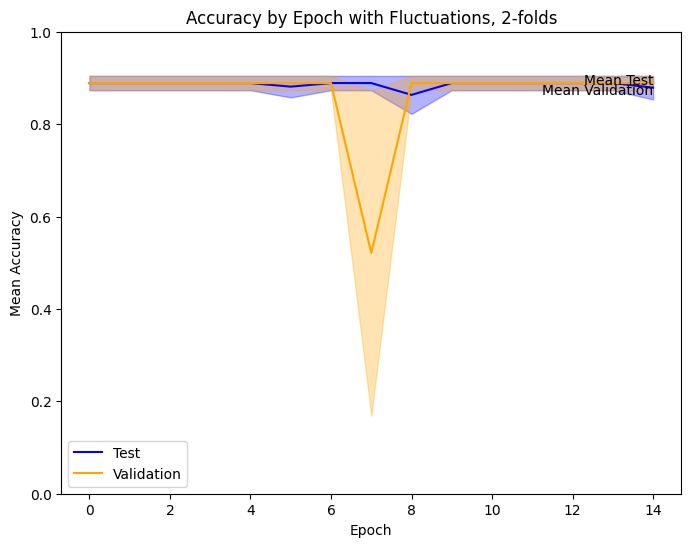

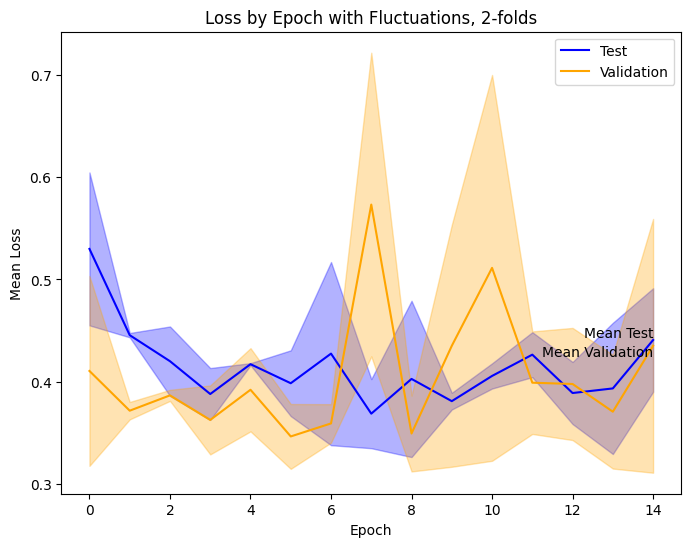

Accuracy: mean=88.889 std=1.556, n=2


In [ ]:
#les resultat son a titre inducatif
print("meilleur resultat pour les renards")
#7 epochs, 3folds, et batch size de 8
moyenne, st_dev, n_folds, histories, model = run_evaluation(15, 2, 32, inputs_fox_generated, targets_fox_generated, modele_resnet50,show_graph=True)


meilleur resultat pour les tigre
Epoch 1/15
8/8 [==============================] - 7s 491ms/step - loss: 0.8514 - accuracy: 0.6827 - val_loss: 1.2929 - val_accuracy: 0.1880
Epoch 2/15
8/8 [==============================] - 1s 156ms/step - loss: 1.1227 - accuracy: 0.6546 - val_loss: 0.5143 - val_accuracy: 0.8120
Epoch 3/15
8/8 [==============================] - 1s 162ms/step - loss: 0.7888 - accuracy: 0.6667 - val_loss: 0.4934 - val_accuracy: 0.8120
Epoch 4/15
8/8 [==============================] - 2s 183ms/step - loss: 0.5789 - accuracy: 0.7871 - val_loss: 0.4843 - val_accuracy: 0.8120
Epoch 5/15
8/8 [==============================] - 1s 160ms/step - loss: 0.5370 - accuracy: 0.7871 - val_loss: 0.4835 - val_accuracy: 0.8120
Epoch 6/15
8/8 [==============================] - 1s 161ms/step - loss: 0.5429 - accuracy: 0.7871 - val_loss: 0.4891 - val_accuracy: 0.8120
Epoch 7/15
8/8 [==============================] - 1s 160ms/step - loss: 0.5372 - accuracy: 0.7871 - val_loss: 0.4822 - val_accu

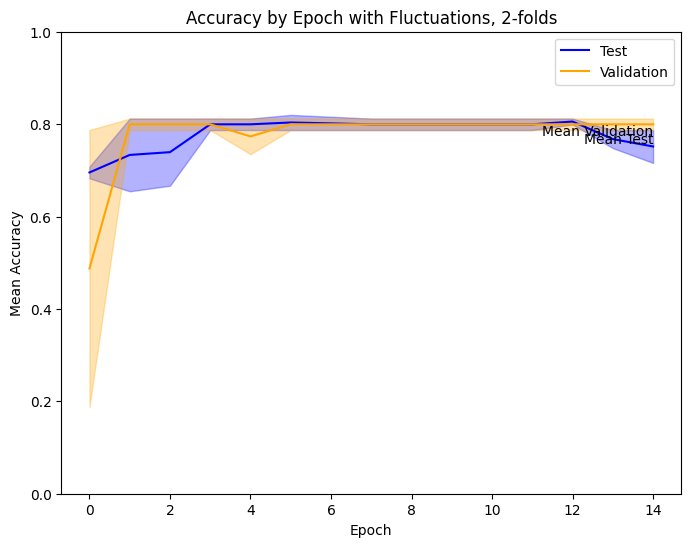

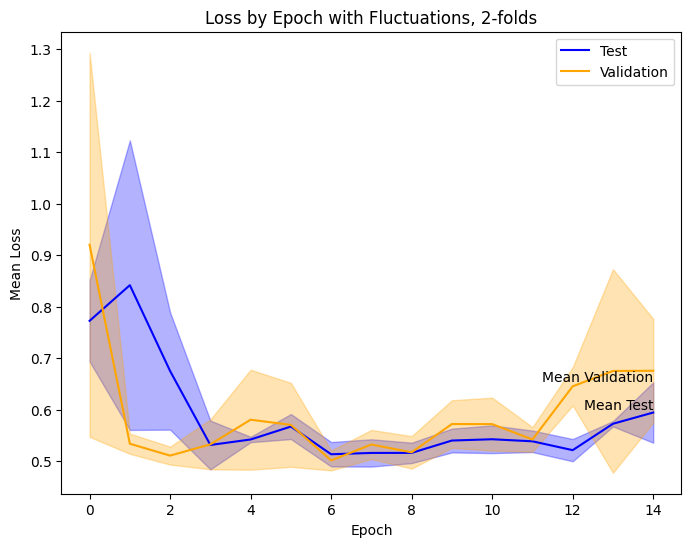

Accuracy: mean=79.957 std=1.243, n=2


In [ ]:
#les resultat son a titre inducatif
print("meilleur resultat pour les tigre")
#5 epochs, 3folds, et batch size de 16
moyenne, st_dev, n_folds, histories, model = run_evaluation(15, 2, 32, inputs_tigre_generated, targets_tigre_generated, modele_resnet50,show_graph=True)

meilleur resultat pour les elephant
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/15
2/2 [==============================] - 16s 6s/step - loss: 0.5364 - accuracy: 0.8280 - val_loss: 0.6557 - val_accuracy: 0.7720
Epoch 2/15
2/2 [==============================] - 2s 1s/step - loss: 0.5492 - accuracy: 0.8280 - val_loss: 0.7571 - val_accuracy: 0.7720
Epoch 3/15
2/2 [==============================] - 1s 753ms/step - loss: 0.5462 - accuracy: 0.8280 - val_loss: 0.5498 - val_accuracy: 0.7720
Epoch 4/15
2/2 [==============================] - 1s 752ms/step - loss: 0.4971 - accuracy: 0.8280 - val_loss: 0.5747 - val_accuracy: 0.7720
Epoch 5/15
2/2 [==============================] - 1s 747ms/step - loss: 0.5012 - accuracy: 0.8280 - val_loss: 0.6011 - val_accuracy: 0.7720
Epoch 6/15
2/2 [==============================] - 1s 746ms/step - loss: 0.4957 - accuracy: 0.8280 - val_loss: 0.6509 - val_accuracy: 0.7720
Epoch 7/15
2/2 [==============================] - 1s 797ms/step 

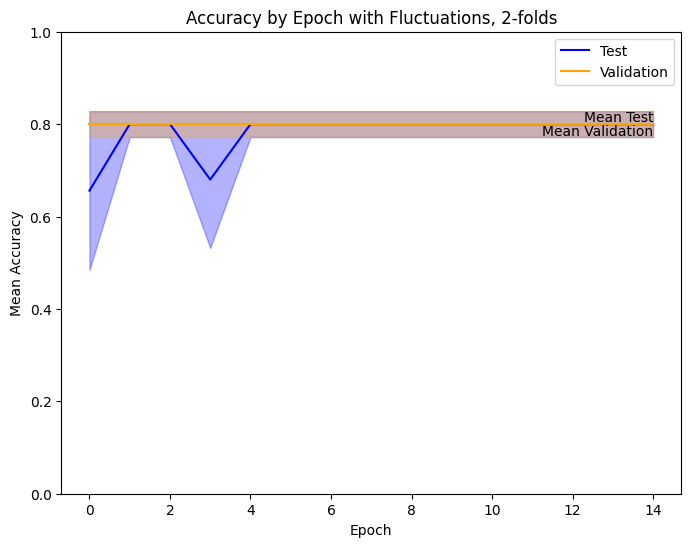

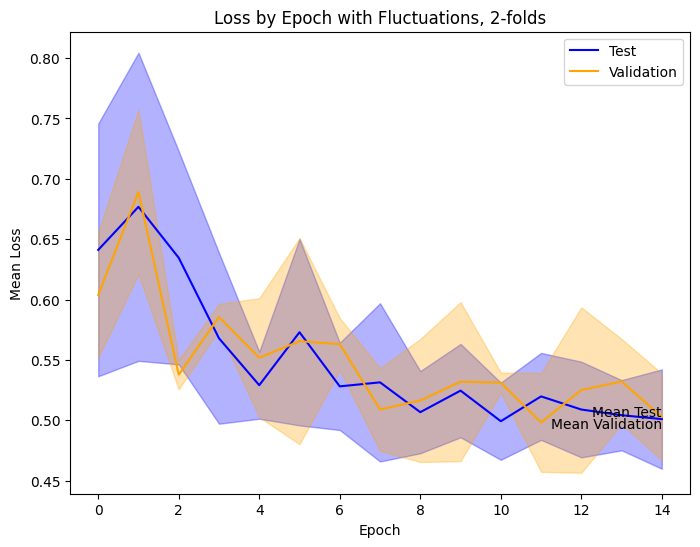

Accuracy: mean=80.000 std=2.800, n=2


In [ ]:
#ici y a trop de surpprentissage car les images genere ne sont pas d'elephant je ne sais pas pourquoi ca s'est produit  pourtant que j'ai réexecuter plusieurs fois !!!
print("meilleur resultat pour les elephant")
#10 epochs, 3folds, et batch size de 8
moyenne, st_dev, n_folds, histories, model = run_evaluation(15, 2, 128, inputs_elephant_generated, targets_elephant_generated, modele_resnet50,show_graph=True)